In [1]:
import os
import cv2
import numpy as np
from subSelectImages import subSelectImages
from segmentImages import segmentImages

def removeBirds():
    selected_images = subSelectImages()
    print(f"Selected images: {selected_images}")

    mask_files = segmentImages()
    print(f"Generated masks: {mask_files}")

    assert len(selected_images) == len(mask_files), "Mismatch between selected images and generated masks!"

    inpainted_images = []

    for img_path, mask_path in zip(selected_images, mask_files):
        print(f"Processing {img_path}...")

        # Load images and masks
        image = cv2.imread(img_path, cv2.IMREAD_COLOR)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = np.where(mask > 128, 255, 0).astype(np.uint8)

        inpainted_image = cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

        # Save the inpainted image
        save_path = img_path.replace(".jpg", "-birdsRemoved.jpg").replace(".jpeg", "-birdsRemoved.jpg")
        cv2.imwrite(save_path, inpainted_image)
        inpainted_images.append(save_path)
        print(f"Saved: {save_path}")

    return inpainted_images

# Example usage
if __name__ == "__main__":
    removed_bird_images = removeBirds()
    print("Birds removed successfully! Files saved:", removed_bird_images)

2025-03-06 21:11:40.574369: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741313500.585579    2986 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741313500.588747    2986 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 21:11:40.606211: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be t

Selected images: ['images/origIm16.jpeg', 'images/origim1.jpeg', 'images/origIm3.jpeg', 'images/origIm6.jpeg', 'images/origIm14.jpeg']


Device set to use cuda:0


Selected images: ['images/origIm16.jpeg', 'images/origim1.jpeg', 'images/origIm3.jpeg', 'images/origIm6.jpeg', 'images/origIm14.jpeg']
Using device: cuda
Loading CLIPSeg model...
Model loaded successfully.
Processing images/origIm16.jpeg for segmentation...
Saved mask: images/origIm16_mask.png
Processing images/origim1.jpeg for segmentation...
Saved mask: images/origim1_mask.png
Processing images/origIm3.jpeg for segmentation...
Saved mask: images/origIm3_mask.png
Processing images/origIm6.jpeg for segmentation...
Saved mask: images/origIm6_mask.png
Processing images/origIm14.jpeg for segmentation...
Saved mask: images/origIm14_mask.png
Generated masks: ['images/origIm16_mask.png', 'images/origim1_mask.png', 'images/origIm3_mask.png', 'images/origIm6_mask.png', 'images/origIm14_mask.png']
Processing images/origIm16.jpeg...
Saved: images/origIm16-birdsRemoved.jpg
Processing images/origim1.jpeg...
Saved: images/origim1-birdsRemoved.jpg
Processing images/origIm3.jpeg...
Saved: images/orig

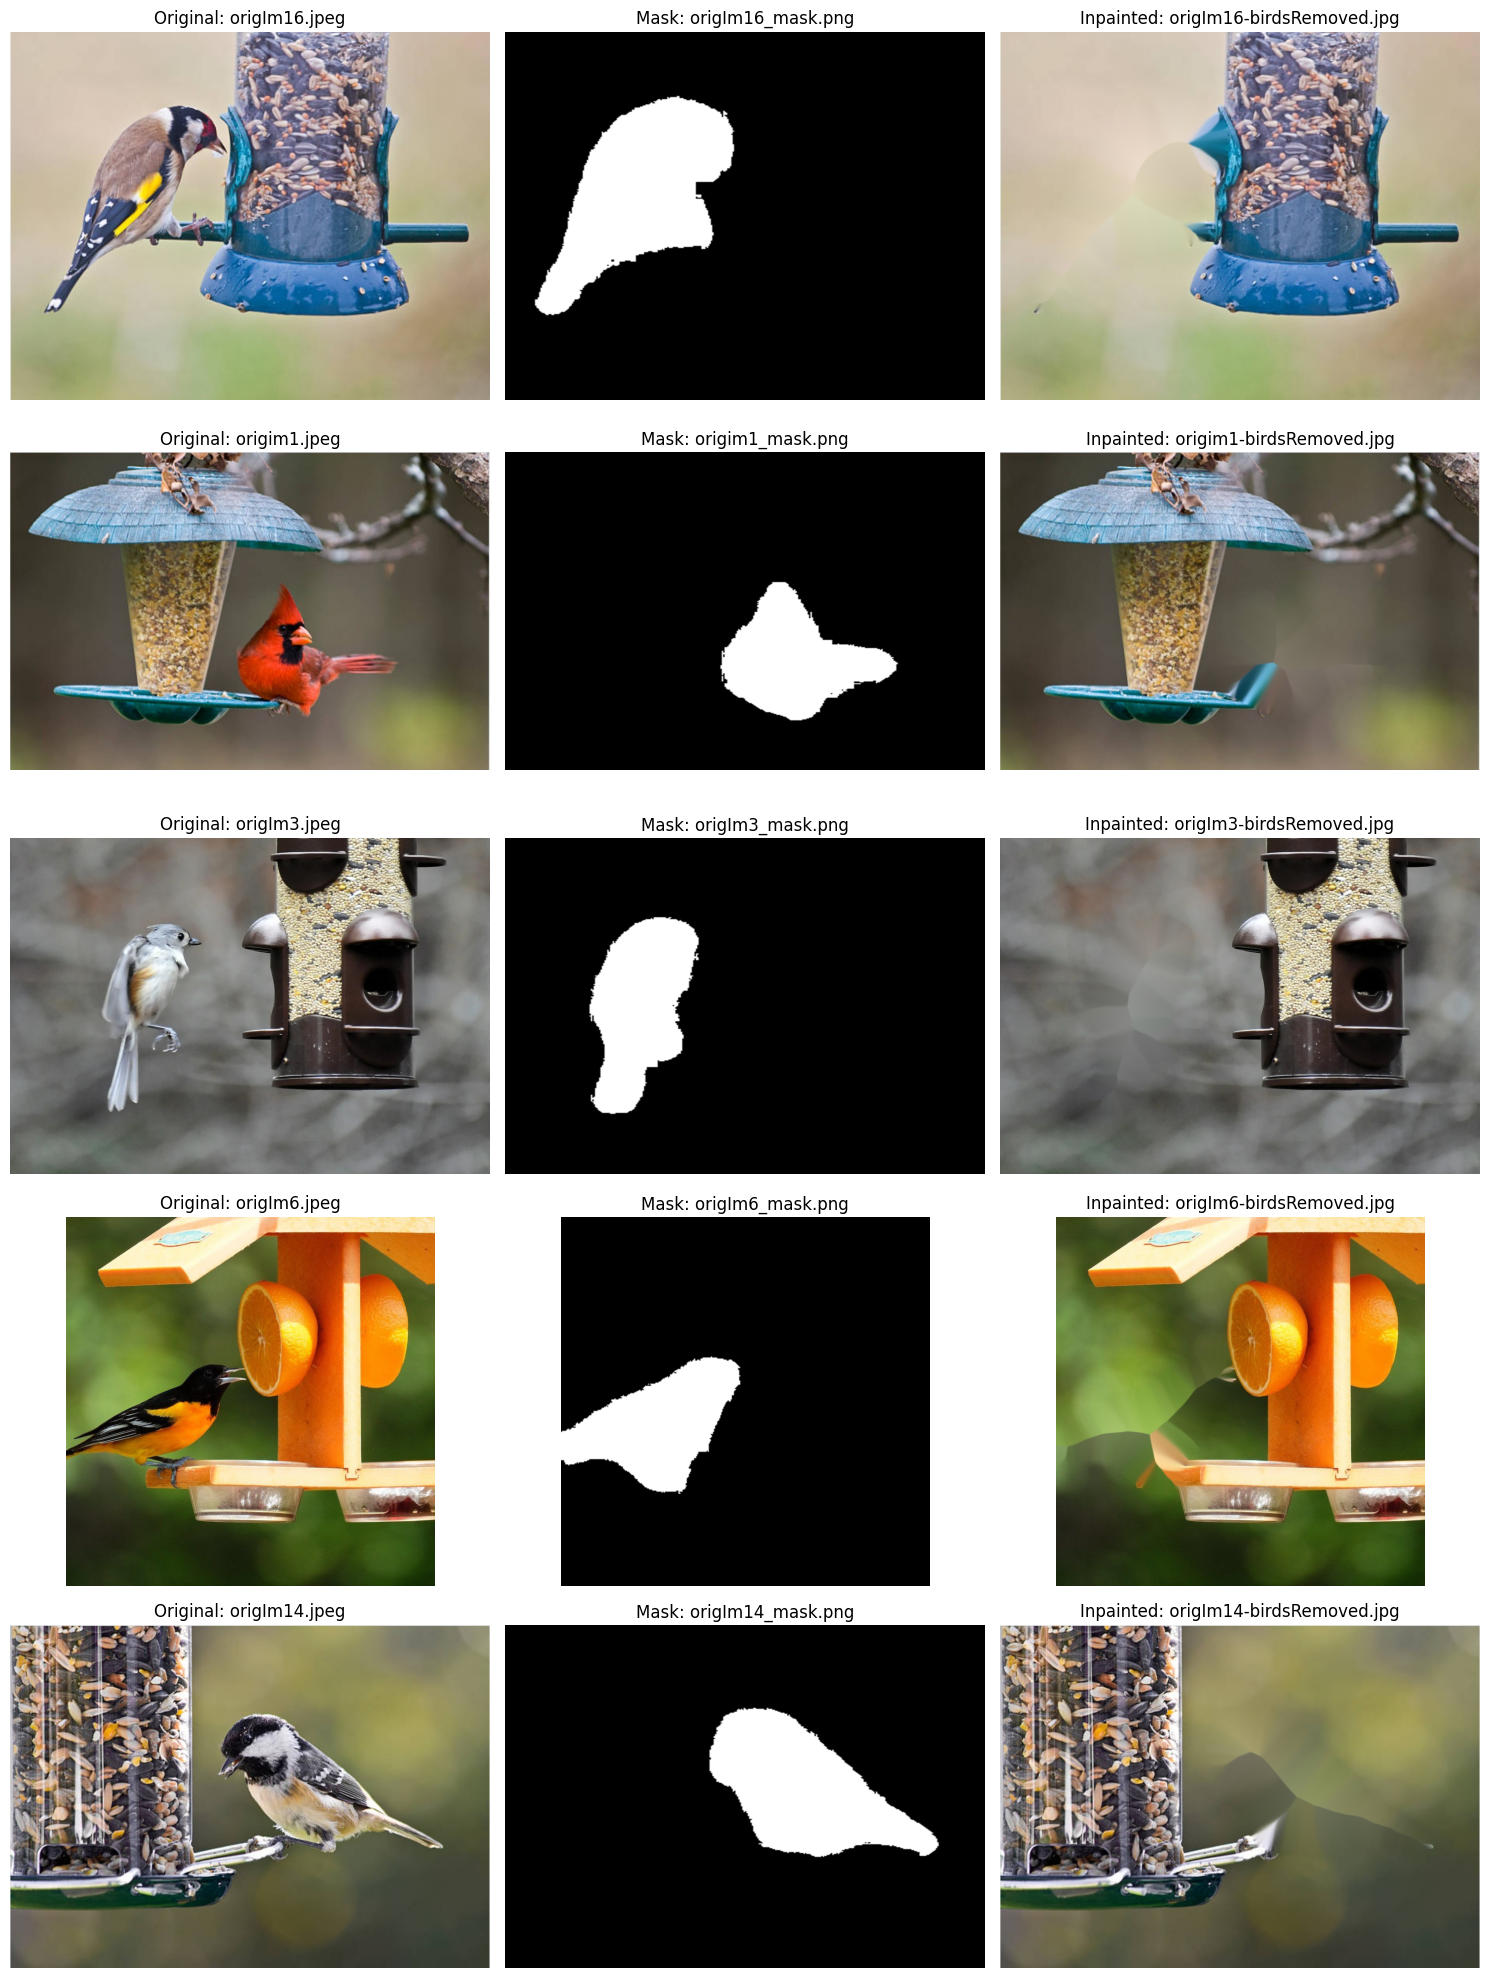

In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Manually define selected images, masks, and inpainted results (from removeBirds.py output)
selected_images = [
    "images/origIm16.jpeg",
    "images/origim1.jpeg",
    "images/origIm3.jpeg",
    "images/origIm6.jpeg",
    "images/origIm14.jpeg"
]

mask_files = [
    "images/origIm16_mask.png",
    "images/origim1_mask.png",
    "images/origIm3_mask.png",
    "images/origIm6_mask.png",
    "images/origIm14_mask.png"
]

inpainted_files = [
    "images/origIm16-birdsRemoved.jpg",
    "images/origim1-birdsRemoved.jpg",
    "images/origIm3-birdsRemoved.jpg",
    "images/origIm6-birdsRemoved.jpg",
    "images/origIm14-birdsRemoved.jpg"
]

# Ensure all lists have the same length
assert len(selected_images) == len(mask_files) == len(inpainted_files), "Mismatch between images, masks, and inpainted results!"

# Set up the figure for visualization (3 columns: Original, Mask, Inpainted)
fig, axes = plt.subplots(len(selected_images), 3, figsize=(15, len(selected_images) * 4))

for i, (orig_path, mask_path, inpaint_path) in enumerate(zip(selected_images, mask_files, inpainted_files)):
    # Load original image
    orig_img = Image.open(orig_path)

    # Load corresponding mask
    mask_img = Image.open(mask_path)

    # Load inpainted image
    inpainted_img = Image.open(inpaint_path)

    # Display original image
    axes[i, 0].imshow(orig_img)
    axes[i, 0].set_title(f"Original: {os.path.basename(orig_path)}")
    axes[i, 0].axis("off")

    # Display segmentation mask
    axes[i, 1].imshow(mask_img, cmap="gray")
    axes[i, 1].set_title(f"Mask: {os.path.basename(mask_path)}")
    axes[i, 1].axis("off")

    # Display inpainted image
    axes[i, 2].imshow(inpainted_img)
    axes[i, 2].set_title(f"Inpainted: {os.path.basename(inpaint_path)}")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()
